In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 2 
class PCA_implement:
  def __init__(self):
    pass
  
  def fit_transform(self, X, n_components):
    self.X = X
    self.n_components= n_components
    # mean centering the data
    X_mean = np.mean(X, axis=0) - X

    # dividing by the std
    X_std = X_mean / np.std(X, axis=0)

    # compute covariance matrix
    cov_mat = np.cov(X_std.T)

    # compute eigenvalues and eigenvectors of convariance matrix
    self.eigen_values, self.eigen_vectors = np.linalg.eigh(cov_mat)

    # sort the eigenvectors in descending order
    sorted_index = np.argsort(self.eigen_values)[::-1]
    sorted_eigenvalue = self.eigen_values[sorted_index]
    sorted_eigenvectors = self.eigen_vectors[:,sorted_index]

    # get the first k eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, 0:self.n_components]

    # transform data
    X_new = np.dot(eigenvector_subset.T, X_std.T).T

    return X_new 

  def explained_variance(self):
    #1. Calculate the proportion of variance explained by each feature
    sum_eigenvalues = np.sum(self.eigen_values)

    prop_var = [i/sum_eigenvalues for i in self.eigen_values]

    #2. Calculate the cumulative variance
    cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]

    return prop_var, cum_var


Text(0.5, 1.0, 'PCA of IRIS dataset')

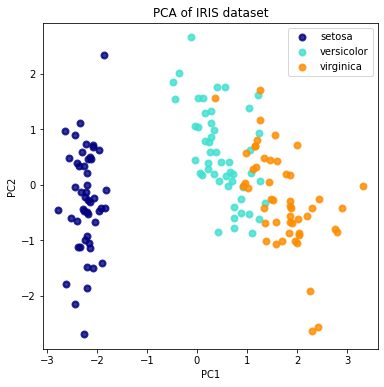

In [ ]:
# 3a
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
y_names = iris.target_names

pca_implement = PCA_implement()
X_reduced = pca_implement.fit_transform(X , 2)
 
plt.figure(figsize=(6, 6))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], y_names):
  plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

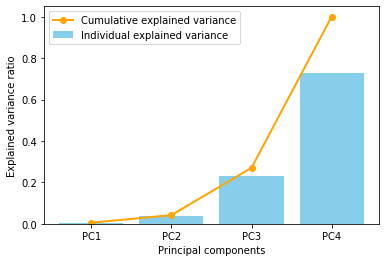

In [ ]:
# 3b
exp_var, exp_cum_sum = pca_implement.explained_variance()
x_labels = ['PC{}'.format(i+1) for i in range(len(exp_var))]

plt.bar(x_labels, exp_var, color='skyblue', linewidth=2, label='Individual explained variance')
plt.plot(x_labels, exp_cum_sum, marker='o', color='orange', linewidth=2, label="Cumulative explained variance")
plt.legend()
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()


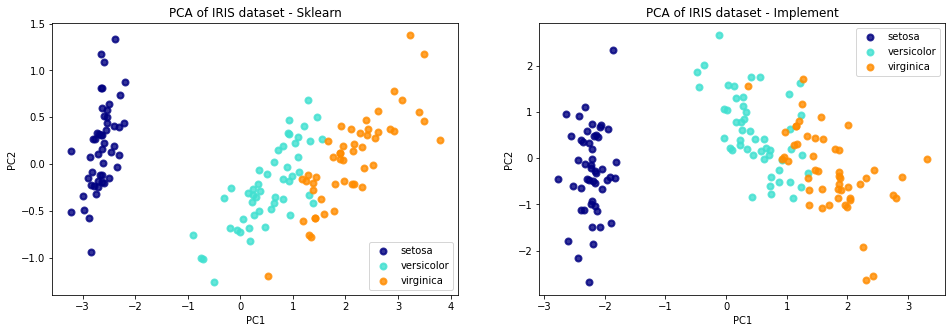

In [ ]:
# 4
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_reduced_sklearn = pca.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
colors = ["navy", "turquoise", "darkorange"]
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], y_names):
  ax1.scatter(X_reduced_sklearn[y == i, 0], X_reduced_sklearn[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
ax1.legend(loc="best", shadow=False, scatterpoints=1)
ax1.set_title("PCA of IRIS dataset - Sklearn")

for color, i, target_name in zip(colors, [0, 1, 2], y_names):
  ax2.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
ax2.legend(loc="best", shadow=False, scatterpoints=1)
ax2.set_title("PCA of IRIS dataset - Implement")

for ax in (ax1, ax2):
  ax.set_xlabel('PC1')
  ax.set_ylabel('PC2')

plt.show()